<a href="https://colab.research.google.com/github/Bao3333/MachineLearning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
boston

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [55]:
# 資料先用pandas整理成表格

boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["ans"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [56]:
# 進入物機器學習階段使用numpy(模擬資料來源為表格的情況,須將表格轉換成array)

import numpy as np
# ↓input
x = np.array(df.drop(["ans"], axis=1))
# ↓output
y = np.array(df["ans"])


In [57]:
# 將資料切分成訓練/測試兩部分

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [58]:
# 把資料丟給演算法學習

from sklearn.tree import DecisionTreeRegressor
# ↓建一棵樹(設定樹的最大深度)
reg = DecisionTreeRegressor(max_depth=4)
#    ↓進行訓練(餵訓練資料/答案)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

[Text(0.58, 0.9, 'RM <= 6.978\nsquared_error = 85.301\nsamples = 455\nvalue = 22.451'),
 Text(0.32, 0.7, 'LSTAT <= 14.4\nsquared_error = 43.672\nsamples = 393\nvalue = 19.981'),
 Text(0.16, 0.5, 'DIS <= 1.385\nsquared_error = 29.318\nsamples = 232\nvalue = 23.534'),
 Text(0.08, 0.3, 'B <= 339.985\nsquared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(0.04, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.12, 0.1, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.24, 0.3, 'RM <= 6.543\nsquared_error = 17.302\nsamples = 227\nvalue = 23.049'),
 Text(0.2, 0.1, 'squared_error = 8.073\nsamples = 173\nvalue = 21.514'),
 Text(0.28, 0.1, 'squared_error = 15.159\nsamples = 54\nvalue = 27.965'),
 Text(0.48, 0.5, 'NOX <= 0.607\nsquared_error = 19.932\nsamples = 161\nvalue = 14.86'),
 Text(0.4, 0.3, 'CRIM <= 0.554\nsquared_error = 12.475\nsamples = 61\nvalue = 18.197'),
 Text(0.36, 0.1, 'squared_error = 5.953\nsamples = 33\nvalue = 20.045'),
 Text(0.44, 0.1, 'squared_e

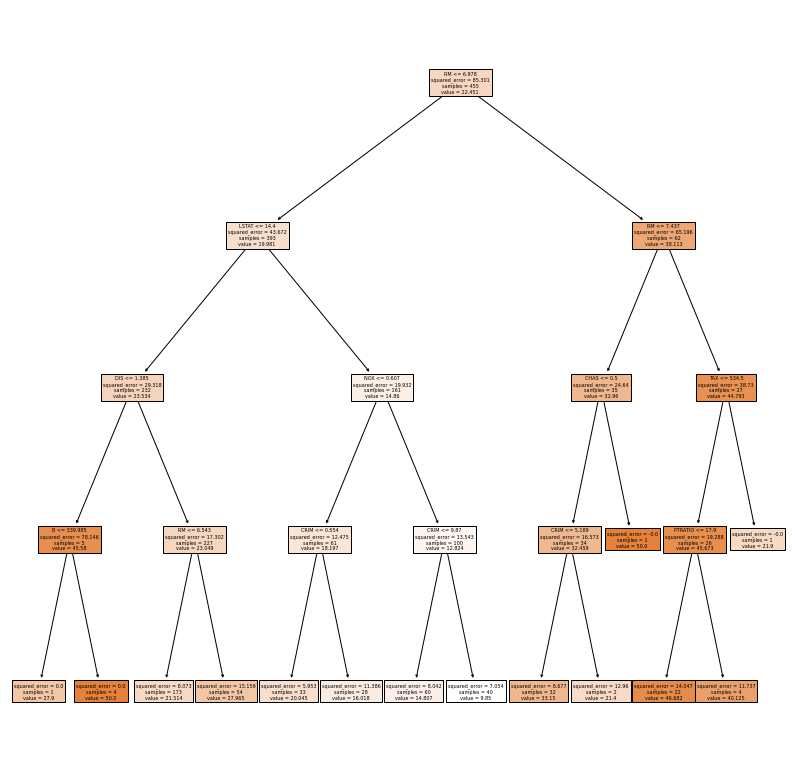

In [59]:
# 把圖片印出來看看

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# ↓調整圖片大小
plt.figure(figsize=(14, 14))

plot_tree(
    reg, # ←樹的參數
    feature_names=boston["feature_names"], # ←帶入欄位名稱 -> df.columns.drop(["ans"]) 使用DataFrame的表示方式也可
    filled=True # ←將圖表底色上色
)

In [60]:
# tree中的value是以分好類後的該類平均值作表示,因此預測出來的數值也會以該筆資料所在類別中之平均值作表示
# 一樣透過觀察r2_score去調整max_depth
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.736074656838958

In [ ]:
"""
regression: rmse v.s. r2_score
classification: gini v.s. accuracy_score
"""